# Amazon + Walmart Review data 

## - modules & pre-processing 

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')

try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd   

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
    
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
    
try:
    import nltk
    from nltk import word_tokenize
    from nltk.stem import SnowballStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('punkt')
except:
    !pip install nltk
    import nltk
    from nltk import word_tokenize
    from nltk.stem import SnowballStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('punkt')
    
try:
    import re
except:
    !pip install re
    import re

try:
    import tensorflow
except:
    !pip install tensorflow
    
    
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm

try:
    import gensim
    from gensim.models import Word2Vec, word2vec
except:
    !pip install gensim
    import gensim
    from gensim.models import Word2Vec, word2vec
    
try:
    import multiprocessing
except:
    !pip install multiprocessing
    import multiprocessing
    
try:
    from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
    from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.svm import SVC
    from sklearn.decomposition import TruncatedSVD
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
except:
    !pip install sklearn
    from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
    from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.svm import SVC
    from sklearn.decomposition import TruncatedSVD
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    

try:
    import xgboost as xgb
    from xgboost import XGBClassifier
    from xgboost import XGBRegressor
except:
    !pip install xgboost
    import xgboost as xgb
    from xgboost import XGBClassifier
    from xgboost import XGBRegressor
    

try:
    from keras.utils import np_utils
    from keras.preprocessing import sequence, text
    from keras.models import Sequential
    from keras.layers.recurrent import LSTM, GRU
    from keras.layers.core import Dense, Activation, Dropout
    from keras.layers.embeddings import Embedding
    from keras.layers.normalization import BatchNormalization
    from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
    from keras.callbacks import EarlyStopping
except:
    !pip install keras
    from keras.utils import np_utils
    from keras.preprocessing import sequence, text
    from keras.models import Sequential
    from keras.layers.recurrent import LSTM, GRU
    from keras.layers.core import Dense, Activation, Dropout
    from keras.layers.embeddings import Embedding
    from keras.layers.normalization import BatchNormalization
    from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
    from keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jin-u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jin-u\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
# import amazon and walmart data 

amazon = pd.read_csv('./data/amazon_comment_seaweed_chip_result.csv')
amazon = amazon.drop(amazon.columns[0], axis = 1)
walmart = pd.read_csv('./data/walmart.csv') 

In [ ]:
# trim amazon comment_date / star_rating 

def name_cut(x):
    x = x.split('on ')[1]
    return x  

amazon["comment_date"] = amazon["comment_date"].apply(name_cut)

def name_cut(x):
    x = x.split(" out")[0]
    x = float(x)
    return x  

amazon["star_rating"] = amazon["star_rating"].apply(name_cut)

In [ ]:
# merge amazon and walmart data 

review = pd.concat([amazon['comment'], walmart['comment']], axis = 0) 
score = pd.concat([amazon['star_rating'], walmart['score']], axis = 0) 
author = pd.concat([amazon['comment_author'], walmart['author']], axis = 0)
date = pd.concat([amazon['comment_date'], walmart['date']], axis = 0)
title = pd.concat([amazon['comment_title'], walmart['title']], axis = 0)

review = pd.DataFrame({'date': date, 'title' : title, 'review': review, 'score': score, 'author': author})

In [ ]:
# stopword and stemmeing

stop_words = set(stopwords.words("english"))
stop_words.update(("yum", "yummy", "love", "loves", "great", "good", "better", "amazing", "buying", "found", "get", "like", "loved", 'maybe', 'may', 'could', 'awesome', 
                   'definitely', 'perfect' , 'best', 'okay', 'excellent', 'disappointed', 'right', 'nice', 'however', 'maybe', 'pretty', 'thank', 'wonderful', 'terrible', 
                   'unfortunately', 'awful', 'horrible', 'worst', 'wont', 'surprised', 'one', 'bad', 'actually', 'really', 'would', 'g', 'nd', 'feoooooooooooo', 'eh', 'ugh'
                    'everybody', 'sometime', 'state', 'fan', 'generally', 'edge', 'report', 'gross', 'buy', 'ewwwwwwww'
))
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "\([^)]*\|s\b|@\S+|https?:\S+|http?:\S|[^a-zA-Z]+"

In [ ]:
# contraction

contraction_mapping = {"won't": "will not",  "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                       "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                       "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                       "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                       "you're": "you are", "you've": "you have"}

In [ ]:
# pre-processing 

def preprocess(text, stem=False):
    newString = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  

    tokens = []
    for token in newString.split():
        if token not in stop_words and len(token) > 1:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return ", ".join(tokens)

In [ ]:
review['cleaned_review'] = review['review'].apply(lambda x: preprocess(x))

In [ ]:
# check for null value

review.isnull().sum()

date              0
title             1
review            1
score             0
author            1
cleaned_review    0
dtype: int64

In [ ]:
review[review['review'].isnull()]

,date,title,review,score,author,cleaned_review
2127,"June 4, 2018",The packaging sucks very disappointed,NaN,1.0,Sydney,nan


In [ ]:
# remove null 

review.replace(' ',np.nan , inplace = True)
review.dropna(axis = 0 , inplace = True, subset = ['review'])

In [ ]:
# 1~2: 0 (negative) / 3~5: 1 (positive) mapping

df = review
X = df['cleaned_review']
y_dict = {1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1}
y = df['score'].map(y_dict)

In [ ]:
# train, test split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                stratify=y, 
                                                random_state=42, 
                                                test_size=0.2, shuffle=True)

In [ ]:
print (x_train.shape)
print (x_test.shape)

(4622,)
(1156,)


## - Building Basic Models 

In [ ]:
# model evaluation metrics visualization 

def model_Evaluate(model, x_test):
    
    # Predict values for Test dataset
    y_pred = model.predict(x_test)

    # Print the evaluation metrics for the dataset.
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
prediction = dict()

In [ ]:
# cross-validation function

def validation(model, x_train):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 0)
    score = cross_val_score(model, x_train, y_train, cv = skf)
    score_mean = score.mean()
    plt.show()

    return score_mean  

### Embedding 1) CountVectorizer

In [ ]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 2))

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(x_train) + list(x_test))
xtrain_ctv =  ctv.transform(x_train) 
xtest_ctv = ctv.transform(x_test)

### - Logistic Regression

0.9065743944636678
              precision    recall  f1-score   support

           0       0.84      0.49      0.62       179
           1       0.91      0.98      0.95       977

    accuracy                           0.91      1156
   macro avg       0.88      0.73      0.78      1156
weighted avg       0.90      0.91      0.90      1156



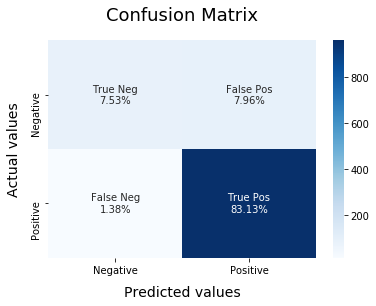

In [ ]:
# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, y_train)

prediction['Logistic'] = clf.predict(xtest_ctv)
validation(clf, xtrain_ctv)
model_Evaluate(clf, xtest_ctv)

### Embedding 2) TfidVectorizer

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',
            ngram_range=(1, 2), use_idf=1, smooth_idf=1, sublinear_tf=1)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(x_train) + list(x_test))
xtrain_tfv =  tfv.transform(x_train) 
xtest_tfv = tfv.transform(x_test)

### - Logistic Regression

0.8814878892733564
              precision    recall  f1-score   support

           0       0.98      0.24      0.39       179
           1       0.88      1.00      0.93       977

    accuracy                           0.88      1156
   macro avg       0.93      0.62      0.66      1156
weighted avg       0.89      0.88      0.85      1156



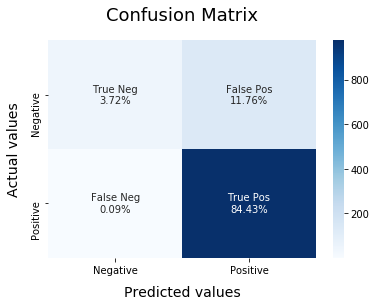

In [ ]:
# Fitting a simple Logistic Regression on TFIDF
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, y_train)

prediction['Logistic_TFIDF'] = clf.predict(xtest_tfv)
model_Evaluate(clf, xtest_tfv)

### - Naive Bayes

0.8788927335640139
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       179
           1       0.87      1.00      0.93       977

    accuracy                           0.88      1156
   macro avg       0.94      0.61      0.65      1156
weighted avg       0.89      0.88      0.84      1156



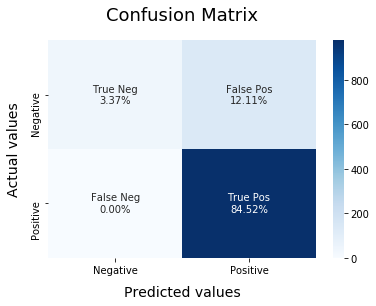

In [ ]:
# Fitting a simple Naive Bayes on TFIDF
clf = MultinomialNB()
clf.fit(xtrain_tfv, y_train)

prediction['Naive Bayes_TFIDF'] = clf.predict(xtest_tfv)
model_Evaluate(clf, xtest_tfv)

### - SVM

In [ ]:
# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xtest_svd = svd.transform(xtest_tfv)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xtest_svd_scl = scl.transform(xtest_svd)

0.889273356401384
              precision    recall  f1-score   support

           0       0.86      0.34      0.49       179
           1       0.89      0.99      0.94       977

    accuracy                           0.89      1156
   macro avg       0.88      0.67      0.71      1156
weighted avg       0.89      0.89      0.87      1156



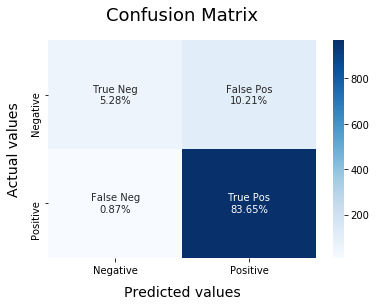

In [ ]:
# Fitting a simple SVM
clf = SVC(C=1.0, probability=True) # since we need probabilities
clf.fit(xtrain_svd_scl, y_train)

prediction['SVM_TFIDF'] = clf.predict(xtest_svd_scl)
model_Evaluate(clf, xtest_svd_scl)

### - xgboost

0.9057093425605537
              precision    recall  f1-score   support

           0       0.87      0.46      0.60       179
           1       0.91      0.99      0.95       977

    accuracy                           0.91      1156
   macro avg       0.89      0.72      0.77      1156
weighted avg       0.90      0.91      0.89      1156



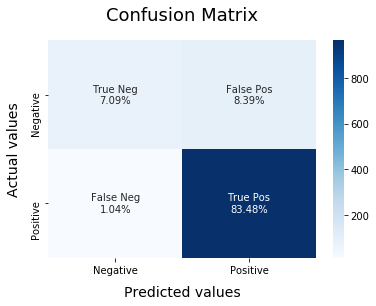

In [ ]:
# Fitting a simple xgboost on Counts
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_ctv.tocsc(), y_train)

prediction['XGboost'] = clf.predict(xtest_ctv.tocsc())
model_Evaluate(clf, xtest_ctv.tocsc())

0.9005190311418685
              precision    recall  f1-score   support

           0       0.85      0.44      0.58       179
           1       0.91      0.99      0.94       977

    accuracy                           0.90      1156
   macro avg       0.88      0.71      0.76      1156
weighted avg       0.90      0.90      0.89      1156



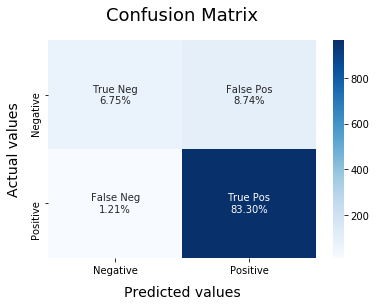

In [ ]:
# Fitting a simple xgboost on tf-idf svd features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_tfv.tocsc(), y_train)

prediction['XGboost_TFIDF'] = clf.predict(xtest_tfv.tocsc())
model_Evaluate(clf, xtest_tfv.tocsc())

0.8918685121107266
              precision    recall  f1-score   support

           0       0.79      0.41      0.54       179
           1       0.90      0.98      0.94       977

    accuracy                           0.89      1156
   macro avg       0.84      0.70      0.74      1156
weighted avg       0.88      0.89      0.88      1156



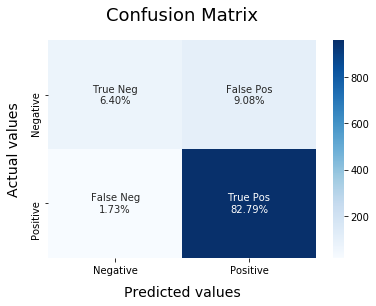

In [ ]:
# Fitting a simple xgboost on tf-idf svd features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_svd, y_train)

prediction['XGboost_TFIDF_SVD'] = clf.predict(xtest_svd)
model_Evaluate(clf, xtest_svd)

### Embedding 3) glove

In [ ]:
embeddings_index = {}
f = open('./data/glove.840B.300d.txt', encoding='utf-8')

for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))







0it [00:00, ?it/s]





493it [00:00, 4929.78it/s]





1059it [00:00, 5128.15it/s]





1703it [00:00, 5461.82it/s]





2372it [00:00, 5780.07it/s]





3112it [00:00, 6186.22it/s]





3763it [00:00, 6279.80it/s]





4464it [00:00, 6482.20it/s]





5139it [00:00, 6560.17it/s]





5894it [00:00, 6828.61it/s]





6758it [00:01, 7286.78it/s]





7610it [00:01, 7617.43it/s]





8494it [00:01, 7946.95it/s]





9296it [00:01, 7584.20it/s]





10063it [00:01, 7587.04it/s]





10974it [00:01, 7987.45it/s]





11900it [00:01, 8330.76it/s]





12869it [00:01, 8696.59it/s]





13751it [00:01, 8733.03it/s]





14657it [00:01, 8828.43it/s]





15546it [00:02, 8324.63it/s]





16389it [00:02, 8137.98it/s]





17211it [00:02, 8162.25it/s]





18033it [00:02, 8130.76it/s]





18864it [00:02, 8183.53it/s]





19686it [00:02, 8194.26it/s]





20508it [00:02, 8009.98it/s]





21324it [00:02, 8054.24it/s]





22219it [00:02, 8303.38it/s]





23053it [00:02, 8119.84it/s]





Found 24616 word vectors.


In [ ]:
def sent2vec(s):
    words = str(s).lower().encode().decode('utf-8')
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [ ]:
xtrain_glove = [sent2vec(x) for x in tqdm(x_train)]
xvalid_glove = [sent2vec(x) for x in tqdm(x_test)]







  0%|                                                                                         | 0/4622 [00:00<?, ?it/s]





  4%|███▏                                                                         | 193/4622 [00:00<00:02, 1929.85it/s]





 10%|████████                                                                     | 485/4622 [00:00<00:01, 2148.38it/s]





 17%|████████████▉                                                                | 779/4622 [00:00<00:01, 2337.13it/s]





 24%|█████████████████▉                                                          | 1090/4622 [00:00<00:01, 2525.35it/s]





 30%|██████████████████████▋                                                     | 1382/4622 [00:00<00:01, 2632.02it/s]





 37%|████████████████████████████▎                                               | 1723/4622 [00:00<00:01, 2825.35it/s]





 45%|█████████████████████████████████▉                                          | 2063/4622 [00:00<00:00, 2976.21it/s]

In [ ]:
xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)

[21:24:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8901384083044983
              precision    recall  f1-score   support

           0       0.84      0.36      0.50       179
           1       0.89      0.99      0.94       977

    accuracy                           0.89      1156
   macro avg       0.87      0.67      0.72      1156
weighted avg       0.89      0.89      0.87      1156



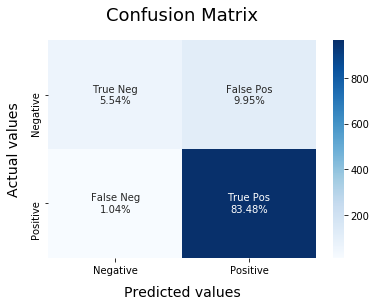

In [ ]:
# Fitting a simple xgboost on glove features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_glove, y_train)

prediction['XGboost_glove'] = clf.predict(xvalid_glove)
model_Evaluate(clf, xvalid_glove)

## - Deep Learning

### - ANN

In [ ]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)

In [ ]:
# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical(y_train)
yvalid_enc = np_utils.to_categorical(y_test)

In [ ]:
# create a simple 3 layer sequential neural net
model = Sequential()

model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(2))
model.add(Activation('sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(xtrain_glove_scl, y=ytrain_enc, batch_size=64, 
          epochs=5, verbose=1, 
          validation_data=(xvalid_glove_scl, yvalid_enc))

Epoch 1/5
73/73 [==============================] - 0s 6ms/step - loss: 0.5990 - val_loss: 0.4245
Epoch 2/5
73/73 [==============================] - 0s 3ms/step - loss: 0.3773 - val_loss: 0.3136
Epoch 3/5
73/73 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.3036
Epoch 4/5
73/73 [==============================] - 0s 3ms/step - loss: 0.2600 - val_loss: 0.3082
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 0.2305 - val_loss: 0.2971


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       179
           1       0.90      0.97      0.94       977

    accuracy                           0.89      1156
   macro avg       0.82      0.70      0.74      1156
weighted avg       0.88      0.89      0.87      1156



Text(0.5, 1, 'Confusion Matrix')

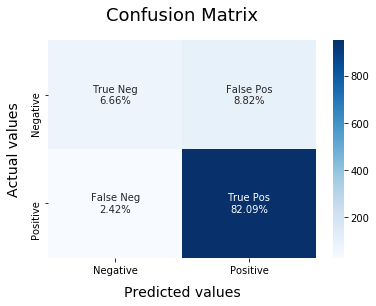

In [ ]:
prediction['ANN_glove'] = model.predict_classes(xvalid_glove_scl)

y_pred = model.predict(xvalid_glove_scl)

print(classification_report(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1)))

cf_matrix = confusion_matrix(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### - LSTM

In [ ]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 5

token.fit_on_texts(list(x_train) + list(x_test))
xtrain_seq = token.texts_to_sequences(x_train)
xvalid_seq = token.texts_to_sequences(x_test)

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector







100%|██████████████████████████████████████████████████████████████████████████| 6163/6163 [00:00<00:00, 186760.32it/s]


In [ ]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/100
10/10 [==============================] - 1s 133ms/step - loss: 0.5213 - val_loss: 0.4270
Epoch 2/100
10/10 [==============================] - 1s 83ms/step - loss: 0.4418 - val_loss: 0.4241
Epoch 3/100
10/10 [==============================] - 1s 83ms/step - loss: 0.4184 - val_loss: 0.3985
Epoch 4/100
10/10 [==============================] - 1s 85ms/step - loss: 0.4014 - val_loss: 0.3952
Epoch 5/100
10/10 [==============================] - 1s 82ms/step - loss: 0.3893 - val_loss: 0.3832
Epoch 6/100
10/10 [==============================] - 1s 81ms/step - loss: 0.3821 - val_loss: 0.3726
Epoch 7/100
10/10 [==============================] - 1s 82ms/step - loss: 0.3746 - val_loss: 0.3682
Epoch 8/100
10/10 [==============================] - 1s 83ms/step - loss: 0.3737 - val_loss: 0.3708
Epoch 9/100
10/10 [==============================] - 1s 80ms/step - loss: 0.3701 - val_loss: 0.3670
Epoch 10/100
10/10 [==============================] - 1s 82ms/step - loss: 0.3619 - val_loss: 0.359

Epoch 82/100
10/10 [==============================] - 1s 90ms/step - loss: 0.2165 - val_loss: 0.3807
Epoch 83/100
10/10 [==============================] - 1s 84ms/step - loss: 0.2010 - val_loss: 0.3574
Epoch 84/100
10/10 [==============================] - 1s 85ms/step - loss: 0.2034 - val_loss: 0.3611
Epoch 85/100
10/10 [==============================] - 1s 82ms/step - loss: 0.1986 - val_loss: 0.3785
Epoch 86/100
10/10 [==============================] - 1s 86ms/step - loss: 0.2210 - val_loss: 0.3687
Epoch 87/100
10/10 [==============================] - 1s 83ms/step - loss: 0.2043 - val_loss: 0.3629
Epoch 88/100
10/10 [==============================] - 1s 82ms/step - loss: 0.2089 - val_loss: 0.3537
Epoch 89/100
10/10 [==============================] - 1s 82ms/step - loss: 0.2030 - val_loss: 0.3715
Epoch 90/100
10/10 [==============================] - 1s 83ms/step - loss: 0.1926 - val_loss: 0.3753
Epoch 91/100
10/10 [==============================] - 1s 93ms/step - loss: 0.1922 - val_los

              precision    recall  f1-score   support

           0       0.56      0.39      0.46       179
           1       0.89      0.94      0.92       977

    accuracy                           0.86      1156
   macro avg       0.72      0.66      0.69      1156
weighted avg       0.84      0.86      0.85      1156



Text(0.5, 1, 'Confusion Matrix')

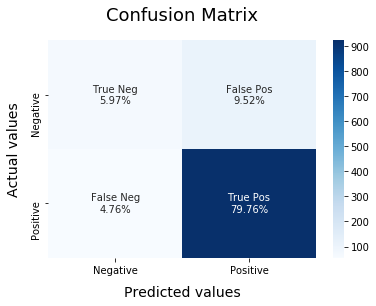

In [ ]:
prediction['LSTM_glove'] = model.predict_classes(xvalid_pad)

y_pred = model.predict(xvalid_pad)

print(classification_report(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1)))

cf_matrix = confusion_matrix(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### - biLSTM

In [ ]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/100
10/10 [==============================] - 2s 177ms/step - loss: 0.5022 - val_loss: 0.4254
Epoch 2/100
10/10 [==============================] - 1s 129ms/step - loss: 0.4272 - val_loss: 0.4053
Epoch 3/100
10/10 [==============================] - 1s 129ms/step - loss: 0.4024 - val_loss: 0.3881
Epoch 4/100
10/10 [==============================] - 1s 126ms/step - loss: 0.3884 - val_loss: 0.3916
Epoch 5/100
10/10 [==============================] - 1s 123ms/step - loss: 0.3750 - val_loss: 0.3831
Epoch 6/100
10/10 [==============================] - 1s 128ms/step - loss: 0.3730 - val_loss: 0.3731
Epoch 7/100
10/10 [==============================] - 1s 123ms/step - loss: 0.3618 - val_loss: 0.3706
Epoch 8/100
10/10 [==============================] - 1s 124ms/step - loss: 0.3649 - val_loss: 0.3579
Epoch 9/100
10/10 [==============================] - 1s 125ms/step - loss: 0.3619 - val_loss: 0.3571
Epoch 10/100
10/10 [==============================] - 1s 129ms/step - loss: 0.3542 - val_lo

              precision    recall  f1-score   support

           0       0.60      0.30      0.40       179
           1       0.88      0.96      0.92       977

    accuracy                           0.86      1156
   macro avg       0.74      0.63      0.66      1156
weighted avg       0.84      0.86      0.84      1156



Text(0.5, 1, 'Confusion Matrix')

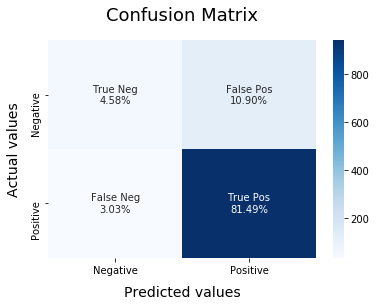

In [ ]:
prediction['BiLSTM_glove'] = model.predict_classes(xvalid_pad)

y_pred = model.predict(xvalid_pad)

print(classification_report(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1)))

cf_matrix = confusion_matrix(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### - GRU

In [ ]:
# GRU with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(200, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(200, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/100
10/10 [==============================] - 2s 193ms/step - loss: 0.5083 - val_loss: 0.4708
Epoch 2/100
10/10 [==============================] - 1s 143ms/step - loss: 0.4381 - val_loss: 0.3978
Epoch 3/100
10/10 [==============================] - 1s 143ms/step - loss: 0.4084 - val_loss: 0.3923
Epoch 4/100
10/10 [==============================] - 1s 139ms/step - loss: 0.3901 - val_loss: 0.3816
Epoch 5/100
10/10 [==============================] - 1s 144ms/step - loss: 0.3835 - val_loss: 0.3784
Epoch 6/100
10/10 [==============================] - 1s 140ms/step - loss: 0.3839 - val_loss: 0.3655
Epoch 7/100
10/10 [==============================] - 1s 142ms/step - loss: 0.3802 - val_loss: 0.3783
Epoch 8/100
10/10 [==============================] - 1s 141ms/step - loss: 0.3724 - val_loss: 0.3569
Epoch 9/100
10/10 [==============================] - 1s 140ms/step - loss: 0.3764 - val_loss: 0.3640
Epoch 10/100
10/10 [==============================] - 1s 140ms/step - loss: 0.3656 - val_lo

              precision    recall  f1-score   support

           0       0.87      0.15      0.25       179
           1       0.86      1.00      0.93       977

    accuracy                           0.86      1156
   macro avg       0.87      0.57      0.59      1156
weighted avg       0.86      0.86      0.82      1156



Text(0.5, 1, 'Confusion Matrix')

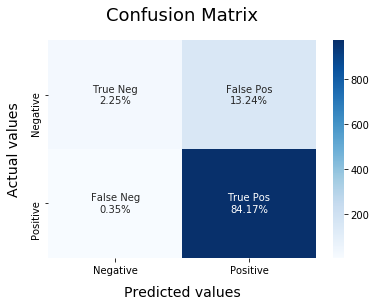

In [ ]:
prediction['GRU_glove'] = model.predict_classes(xvalid_pad)

y_pred = model.predict(xvalid_pad)

print(classification_report(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1)))

cf_matrix = confusion_matrix(yvalid_enc.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## - Model comparison

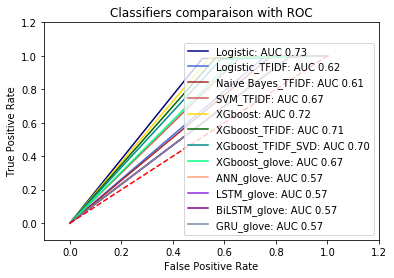

In [ ]:
# ROC curve

colors_1 = ['navy', 'royalblue', 'brown', 'indianred', 'gold', 'darkgreen', 'darkcyan', 'springgreen', 'lightyellow']

colors_2 = ['lightsalmon', 'blueviolet', 'purple', 'lightslategrey']

cmp_1 = 0
for model, predicted in prediction.items():
    if model in ('Logistic', 'Logistic_TFIDF', 'Naive Bayes_TFIDF',
                 'SVM_TFIDF', 'XGboost', 'XGboost_TFIDF', 'XGboost_TFIDF_SVD',
                 'XGboost_glove'):
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors_1[cmp_1], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp_1 += 1

cmp_2 = 0
for model, predicted in prediction.items():
    if model in ('ANN_glove', 'LSTM_glove', 'BiLSTM_glove', 'GRU_glove'):
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred.argmax(axis=1))
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors_2[cmp_2], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp_2 += 1
        
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rc('figure', figsize=(12, 8))
plt.show()

In [ ]:
# Accuracy comparison 

model = ['Logistic', 'Logistic_TFIDF', 'Naive Bayes_TFIDF',
        'SVM_TFIDF', 'XGboost', 'XGboost_TFIDF', 'XGboost_TFIDF_SVD',
        'XGboost_glove']
accuracy = []

for m in model:
    accuracy.append(accuracy_score(y_test, prediction[m]))
       
accuracy_list = pd.DataFrame({'model': model, 'accuracy' : accuracy})

In [ ]:
accuracy_list

,model,accuracy
0,Logistic,0.906574
1,Logistic_TFIDF,0.881488
2,Naive Bayes_TFIDF,0.878893
3,SVM_TFIDF,0.889273
4,XGboost,0.905709
5,XGboost_TFIDF,0.900519
6,XGboost_TFIDF_SVD,0.891869
7,XGboost_glove,0.890138


Text(0.5, 1.0, 'Classifiers comparaison with accuracy')

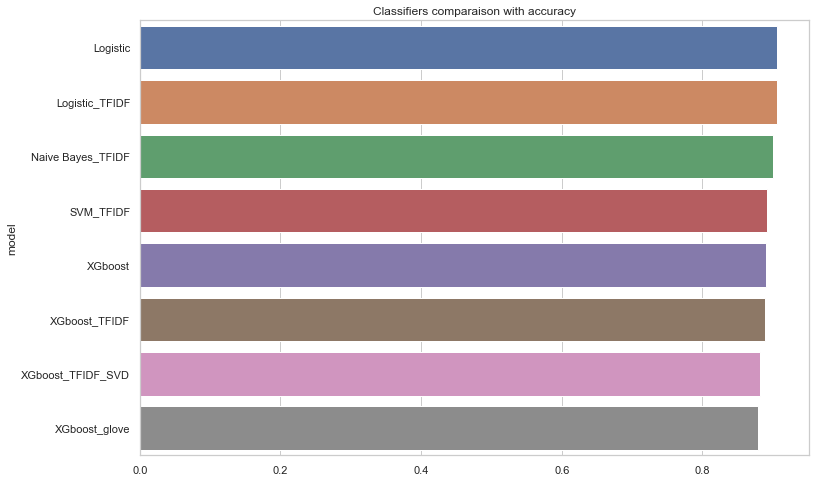

In [ ]:
y = accuracy_list['model']
x = accuracy_list['accuracy'].sort_values(ascending=False).values

sns.set(style="whitegrid")
ax = sns.barplot(x=x, y=y)
ax.set_title('Classifiers comparaison with accuracy')

## - visualization: keywords from logistic regression

### - XGBoost

In [ ]:
# Fitting a simple xgboost on Counts
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, booster ='gblinear')
xgb_result = xgb.fit(xtrain_ctv.tocsc(), y_train)

features = ctv.get_feature_names()
feature_coefs = pd.DataFrame({'word' : features, 'coefficient': xgb.coef_})

feature_coefs = feature_coefs.sort_values(['coefficient', 'word'], ascending = [0, 1])
feature_coefs.head(20)

[21:29:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,word,coefficient
46931,taste enjoyed,14.4975
29189,never tried,14.0653
32989,people salt,13.5674
46944,taste expensive,13.4392
17118,flavor expensive,13.3144
17272,flavor order,13.2487
37302,repurchase,12.0891
8247,company much,12.0025
371,addicting,11.9878
3645,bbq,11.7636


In [ ]:
print('-Top 20 positive-')
print(feature_coefs.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(feature_coefs.tail(20).to_string(index=False)) 

-Top 20 positive-
             word  coefficient
    taste enjoyed      14.4975
      never tried      14.0653
      people salt      13.5674
  taste expensive      13.4392
 flavor expensive      13.3144
     flavor order      13.2487
       repurchase      12.0891
     company much      12.0025
        addicting      11.9878
              bbq      11.7636
         daughter      11.5545
        delicious      11.4912
        addictive      11.3250
              mom      11.1217
          toddler      10.8579
            value      10.8577
         teriyaki      10.6131
       assortment      10.5003
         calories      10.4009
    strong wasabi      10.3950

-Top 20 negative-
              word  coefficient
           suppose     -13.7097
 product described     -13.8801
        chips also     -14.0368
            greasy     -14.1224
 product delicious     -14.1717
         tooliking     -14.2224
              nope     -14.2725
     stale product     -14.5926
               ugh     -

### - Logistic regression

In [ ]:
log = LogisticRegression(C=1.0)
log_result = log.fit(xtrain_ctv, y_train)

features = ctv.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, log_result.coef_[0])),
    columns = ['word', 'coefficient'])

feature_coefs = feature_coefs.sort_values(['coefficient', 'word'], ascending = [0, 1])
feature_coefs.head(20)

,word,coefficient
11071,delicious,1.582491
42256,snack,1.205662
47706,tasty,1.172633
15767,favorite,1.130942
5967,calories,1.026885
43837,son,1.020963
23983,kids,1.005536
408,addictive,0.969737
10604,daughter,0.966203
17689,flavors,0.961235


In [ ]:
print('-Top 20 positive-')
print(feature_coefs.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(feature_coefs.tail(20).to_string(index=False)) 

-Top 20 positive-
      word  coefficient
 delicious     1.582491
     snack     1.205662
     tasty     1.172633
  favorite     1.130942
  calories     1.026885
       son     1.020963
      kids     1.005536
 addictive     0.969737
  daughter     0.966203
   flavors     0.961235
      fast     0.951011
      easy     0.949395
       bbq     0.863981
     value     0.837409
       bit     0.836003
      keep     0.834083
  addicted     0.800740
    enough     0.795018
   crunchy     0.769156
      seem     0.752639

-Top 20 negative-
       word  coefficient
       date    -0.939042
     opened    -0.942676
      boxes    -0.952218
      fishy    -0.955349
     tasted    -0.989324
    expired    -1.084274
      threw    -1.130120
  cardboard    -1.131511
       hard    -1.145988
    crushed    -1.212656
        box    -1.223059
 disgusting    -1.248249
       fish    -1.259242
     return    -1.265660
   received    -1.312428
      sorry    -1.354769
      nasty    -1.608265
     crum

In [ ]:
p = feature_coefs.head(20)
n = feature_coefs.tail(20)

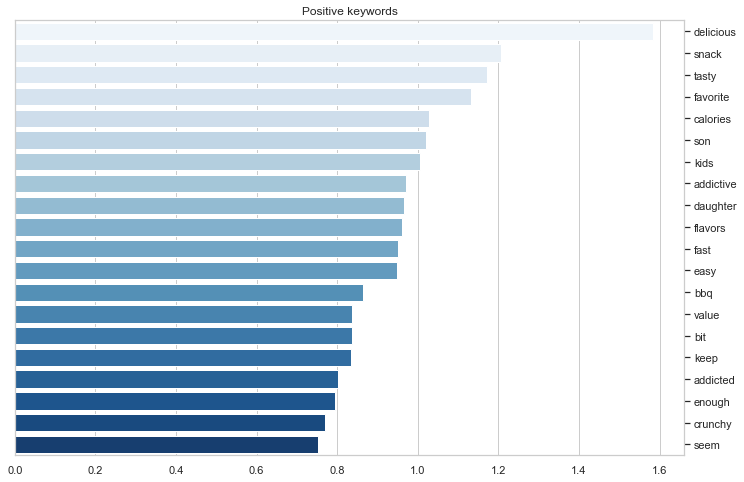

<Figure size 720x1440 with 0 Axes>

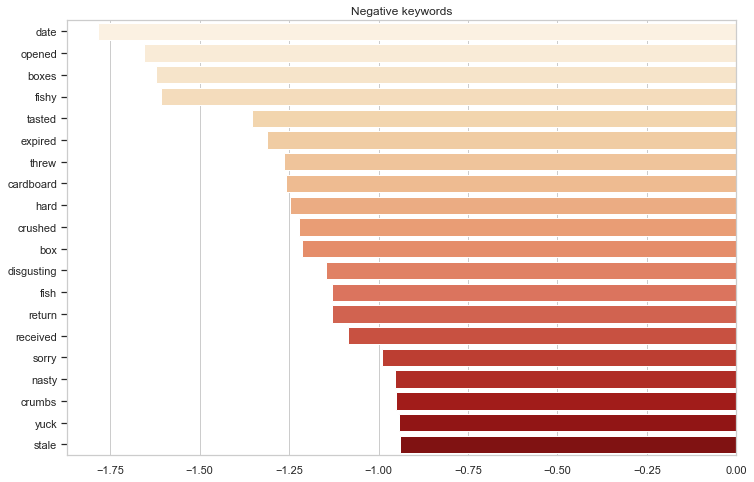

<Figure size 720x1440 with 0 Axes>

In [ ]:
p_y = p['word'].values
p_x = p['coefficient'].sort_values(ascending=False).values

n_y = n['word'].values
n_x = n['coefficient'].sort_values().values

sns.set(style="whitegrid")
ax1 = sns.barplot(x=p_x, y=p_y, palette="Blues", label=p_y)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax1.set_title('Positive keywords')
plt.figure(figsize=(10,20))
plt.show()

ax2 = sns.barplot(x=n_x, y=n_y, palette="OrRd", label=n_y)
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position('left')
ax2.set_title('Negative keywords')
plt.figure(figsize=(10,20))
plt.show()